In [1]:
#%matplotlib inline

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv('/Users/apple/.kaggle/competitions/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/Users/apple/.kaggle/competitions/house-prices-advanced-regression-techniques/test.csv')
combine = pd.concat([train.drop('SalePrice',1),test])


In [3]:
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1177,1178,50,RM,NaN,3950,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,115000
1196,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
401,402,20,RL,65.0,8767,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,164990
492,493,60,RL,105.0,15578,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,172785
307,308,50,RM,NaN,7920,Pave,Grvl,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2008,WD,Normal,89500


In [4]:
for i in train.drop('Id', axis =1).columns:
    print(i)
    print(train[i].value_counts().head(5))
    print('---------')

MSSubClass
20     536
60     299
50     144
120     87
30      69
Name: MSSubClass, dtype: int64
---------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
---------
LotFrontage
60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64
---------
LotArea
7200     25
9600     24
6000     17
10800    14
9000     14
Name: LotArea, dtype: int64
---------
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
---------
Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
---------
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
---------
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
---------
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
---------
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
---------
LandSlo

In [5]:
train.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [6]:
train.shape[0]

1460

Missing value

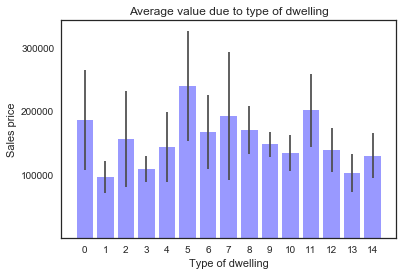

In [7]:
mean_saleprice = train.groupby('MSSubClass')['SalePrice'].mean()
std_saleprice = train.groupby('MSSubClass')['SalePrice'].std()
fig, ax = plt.subplots()
index = np.arange(mean_saleprice.shape[0])
bar_width = 0.8
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects = ax.bar(index, mean_saleprice, bar_width, alpha = opacity, color = 'b', yerr= std_saleprice, error_kw = error_config,label = 'Type of dwelling')
ax.set_xlabel('Type of dwelling')
ax.set_ylabel('Sales price')
ax.set_title('Average value due to type of dwelling')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.set_yticks((100000, 200000, 300000))
plt.show()


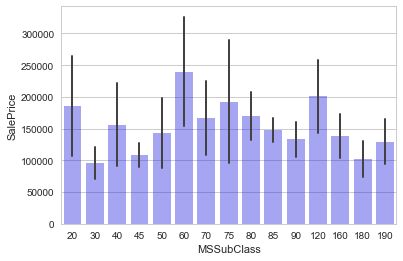

In [8]:
sns.set_style("whitegrid")
sns.barplot('MSSubClass', 'SalePrice', data = train, ci = 'sd', color = 'b', alpha = 0.4, errwidth = 2)
plt.savefig('MSSubClass_SalePrice.eps', format = 'eps', dpi = 1000)


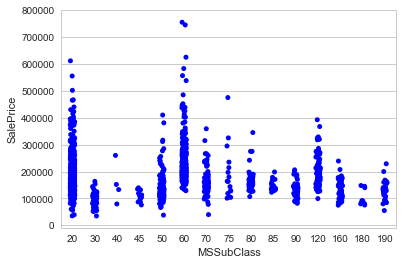

In [9]:
sns.stripplot(x = 'MSSubClass', y = 'SalePrice', data = train, jitter = True, color ='b')

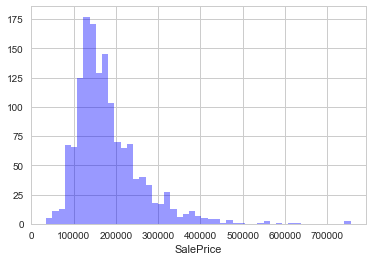

In [10]:
sns.distplot(train.SalePrice, kde = False, vertical = False, color = 'b')

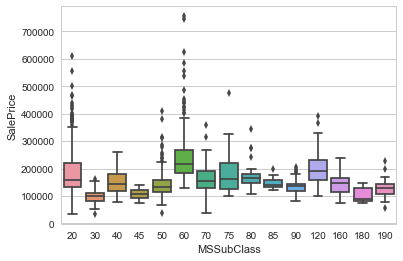

In [11]:
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = train)

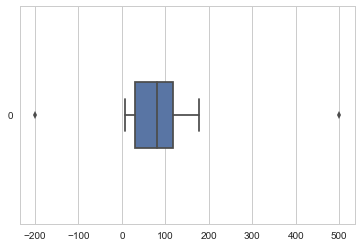

In [12]:
a = pd.Series([-200,7,7,31,31,47,75,87, 115, 116,119,155,177,500])
sns.boxplot(data = a, orient='h',width = 0.3)

In [13]:
a.quantile(0.75)-a.quantile(0.25)

87.25

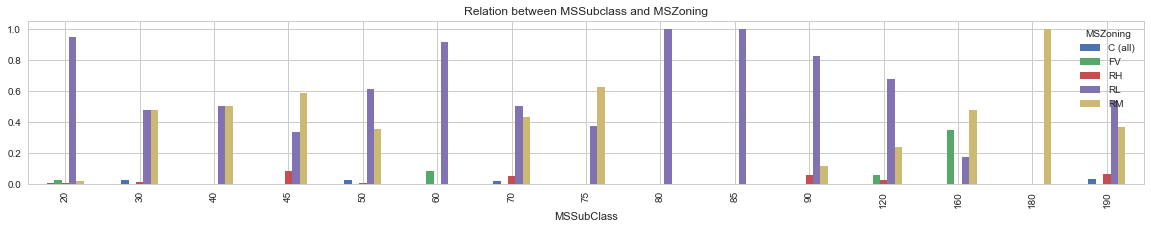

In [14]:
tab = pd.crosstab(train.MSSubClass, train.MSZoning)
plt.rcParams["figure.figsize"] = (20,3)
dummy = tab.div(tab.sum(1), axis = 'index')
dummy.plot(kind = 'bar', stacked = False, title = 'Relation between MSSubclass and MSZoning')


In [15]:
train[train.LotFrontage.isnull()].sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
50,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
1381,1382,20,RL,NaN,12925,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,237500
559,560,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,234000
1346,1347,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,262500
1161,1162,20,RL,NaN,14778,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,224000
626,627,20,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,600,8,2007,WD,Normal,139900
111,112,80,RL,NaN,7750,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,180000
645,646,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250
941,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
1318,1319,20,RL,NaN,14781,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,275000


In [16]:
train.groupby('MSSubClass')[['MSSubClass','MSZoning', 'LotFrontage', 'LotArea', 'Street','Alley']].describe().T

MSSubClass                   20            30           40            45   \
MSSubClass  count     536.000000     69.000000      4.00000     12.000000   
            mean       20.000000     30.000000     40.00000     45.000000   
            std         0.000000      0.000000      0.00000      0.000000   
            min        20.000000     30.000000     40.00000     45.000000   
            25%        20.000000     30.000000     40.00000     45.000000   
            50%        20.000000     30.000000     40.00000     45.000000   
            75%        20.000000     30.000000     40.00000     45.000000   
            max        20.000000     30.000000     40.00000     45.000000   
LotFrontage count     437.000000     63.000000      3.00000     12.000000   
            mean       77.464531     60.349206     50.00000     55.000000   
            std        21.469132     18.715320     10.00000      3.931227   
            min        36.000000     30.000000     40.00000     50.000000   
            25%        65.000000     50.000000     45.00000     50.750000   
            50%        75.000000     59.000000     50.00000     55.000000   
            75%        85.000000     60.000000     55.00000     58.250000   
            max       313.000000    153.000000     60.00000     60.000000   
LotArea     count     536.000000     69.000000      4.00000     12.000000   
            mean    11755.509328   7888.492754  12559.75000   6949.000000   
            std     11402.846394   3441.140503   7856.66343   1904.229694   
            min      3182.000000   3636.000000   5400.00000   4388.000000   
            25%      8542.000000   5825.000000   8175.00000   5875.000000   
            50%     10000.000000   7200.000000  10622.00000   6255.000000   
            75%     12156.250000   9022.000000  15006.75000   7836.750000   
            max    215245.000000  25339.000000  23595.00000  10594.000000   

MSSubClass                   50            60            70            75   \
MSSubClass  count     144.000000    299.000000     60.000000     16.000000   
            mean       50.000000     60.000000     70.000000     75.000000   
            std         0.000000      0.000000      0.000000      0.000000   
            min        50.000000     60.000000     70.000000     75.000000   
            25%        50.000000     60.000000     70.000000     75.000000   
            50%        50.000000     60.000000     70.000000     75.000000   
            75%        50.000000     60.000000     70.000000     75.000000   
            max        50.000000     60.000000     70.000000     75.000000   
LotFrontage count     128.000000    230.000000     55.000000     15.000000   
            mean       64.000000     81.056522     65.654545     77.533333   
            std        17.980742     24.844166     18.958256     32.321746   
            min        40.000000     41.000000     34.000000     35.000000   
            25%        52.000000     68.000000     56.000000     60.000000   
            50%        60.000000     77.500000     60.000000     65.000000   
            75%        70.000000     88.000000     68.000000     90.000000   
            max       152.000000    313.000000    144.000000    174.000000   
LotArea     count     144.000000    299.000000     60.000000     16.000000   
            mean    10479.145833  12058.076923  10120.166667  11631.750000   
            std     13248.215400   6415.471957   4132.388968   6087.755695   
            min      3500.000000   3378.000000   2500.000000   5520.000000   
            25%      6240.000000   9125.000000   7244.250000   7182.000000   
            50%      8724.500000  10728.000000   9600.000000   9225.000000   
            75%     11008.500000  12513.000000  11569.500000  14090.750000   
            max    159000.000000  63887.000000  24090.000000  25419.000000   

MSSubClass                  80            85            90            120  \
MSSubClass  count     58.000000     20.000000 

In [17]:
for i in train.columns:
    a = train.groupby(i)['LotFrontage'].describe()
    print(i)
    print(a['std'].mean())
    print("------------")

Id
nan
------------
MSSubClass
15.4009931519
------------
MSZoning
20.9310238613
------------
LotFrontage
0.0
------------
LotArea
4.55454400519
------------
Street
26.8145758939
------------
Alley
18.2296291797
------------
LotShape
49.0800928389
------------
LandContour
33.2136910763
------------
Utilities
24.2847517745
------------
LotConfig
27.6117985964
------------
LandSlope
34.1524893726
------------
Neighborhood
17.7724441904
------------
Condition1
32.070370171
------------
Condition2
21.3802653124
------------
BldgType
13.7902643574
------------
HouseStyle
18.3891926399
------------
OverallQual
23.964742611
------------
OverallCond
23.0776758649
------------
YearBuilt
18.6117284064
------------
YearRemodAdd
20.7169708223
------------
RoofStyle
32.3619726867
------------
RoofMatl
33.1035900568
------------
Exterior1st
24.1683383986
------------
Exterior2nd
24.6473869487
------------
MasVnrType
23.2904280351
------------
MasVnrArea
15.7968710426
------------
ExterQual
27.418350

so we should choose Lot Area to transform the LotFrontage missing

In [20]:
train[train['Electrical'].isnull()].T.head(50)

,1379
Id,1380
MSSubClass,80
MSZoning,RL
LotFrontage,73
LotArea,9735
Street,Pave
Alley,NaN
LotShape,Reg
LandContour,Lvl
Utilities,AllPub
